<a href="https://colab.research.google.com/github/nickbohall/pgaModel/blob/main/pga_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **This is a PGA betting Model**

# Imports

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Notebook presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Read in the Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PGA Model/2023_RBC Heritage_data.csv")

# Clean & Describe the Data

In [ ]:
data.shape
data.count()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         243 non-null    int64  
 1   player             243 non-null    object 
 2   player_id          243 non-null    int64  
 3   scoring Average    203 non-null    float64
 4   SG total Average   203 non-null    float64
 5   SG OTT Average     203 non-null    float64
 6   SG ATG Average     203 non-null    float64
 7   SG TTG Average     203 non-null    float64
 8   SG APR Average     203 non-null    float64
 9   SG PUT Average     203 non-null    float64
 10  avg_score_tourney  168 non-null    float64
 11  avg_cut_tourney    168 non-null    float64
 12  avg_score_course   168 non-null    float64
 13  avg_cut_course     168 non-null    float64
 14  index              100 non-null    float64
 15  last_season_score  100 non-null    float64
 16  last_season_cut    100 non

,Unnamed: 0,player,player_id,scoring Average,SG total Average,SG OTT Average,SG ATG Average,SG TTG Average,SG APR Average,SG PUT Average,avg_score_tourney,avg_cut_tourney,avg_score_course,avg_cut_course,index,last_season_score,last_season_cut,odds
0,0,Anders Albertson,49303,71.97,-0.96,-0.75,-0.12,-1.71,-0.84,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tyson Alexander,33408,71.44,-0.66,-0.35,0.24,-0.66,-0.56,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Byeong Hun An,33948,70.62,0.57,0.08,0.59,0.72,0.05,-0.14,0.75,0.25,0.75,0.25,NaN,NaN,NaN,NaN
3,3,Ryan Armour,19803,71.42,-0.45,-0.08,-0.07,-0.26,-0.11,-0.19,1.00,0.75,1.00,0.75,NaN,NaN,NaN,NaN
4,4,Aaron Baddeley,22371,70.80,0.20,-0.23,0.41,0.04,-0.14,0.15,-0.17,0.50,-0.17,0.50,NaN,NaN,NaN,NaN


In [ ]:
print(f'Any NaN values? {data.isna().values.any()}')
print(f'Any duplicates? {data.duplicated().values.any()}')

Any NaN values? True
Any duplicates? False


In [ ]:
clean_df = data.drop(columns=["Unnamed: 0", "odds", "index"], axis=1).dropna()
clean_df.describe()

,player_id,scoring Average,SG total Average,SG OTT Average,SG ATG Average,SG TTG Average,SG APR Average,SG PUT Average,avg_score_tourney,avg_cut_tourney,avg_score_course,avg_cut_course,last_season_score,last_season_cut
count,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00,93.00
mean,"35,642.29",71.22,-0.02,-0.06,0.01,-0.02,0.02,0.00,-1.53,0.57,-1.53,0.57,-0.77,0.55
std,"8,933.71",0.78,0.97,0.43,0.28,0.86,0.55,0.43,5.23,0.33,5.23,0.33,7.18,0.50
min,"12,716.00",69.94,-3.55,-1.63,-0.61,-3.27,-1.96,-1.03,-12.50,0.00,-12.50,0.00,-13.00,0.00
25%,"29,970.00",70.60,-0.50,-0.26,-0.19,-0.49,-0.25,-0.31,-4.20,0.33,-4.20,0.33,-7.00,0.00
50%,"33,448.00",71.25,-0.06,-0.02,0.04,0.02,0.07,0.02,-2.25,0.62,-2.25,0.62,1.00,1.00
75%,"39,971.00",71.69,0.68,0.15,0.21,0.52,0.39,0.32,2.00,0.80,2.00,0.80,4.00,1.00
max,"57,366.00",73.25,1.84,0.96,0.63,1.73,1.25,1.33,19.00,1.00,19.00,1.00,19.00,1.00


# Training

In [ ]:
target = clean_df["last_season_score"]
features = clean_df.drop(columns=["player", "player_id", "last_season_score", "last_season_cut"])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size = 0.3, random_state = 10)
X_train.shape, Y_train.shape

((65, 11), (65,))

In [ ]:
X_test.shape, Y_test.shape

((28, 11), (28,))

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(features.columns)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_ : .3f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred): .3f} ")
print(f"Coefficient of determination (R^2): {r2_score(Y_test, Y_pred): .3f}")

Index(['scoring Average', 'SG total Average', 'SG OTT Average',
       'SG ATG Average', 'SG TTG Average', 'SG APR Average', 'SG PUT Average',
       'avg_score_tourney', 'avg_cut_tourney', 'avg_score_course',
       'avg_cut_course'],
      dtype='object')
Coefficients: [ 1.03630005  3.52759991 -1.23789846 -1.37443236 -1.84847821 -1.32440681
 -2.96349027  0.39142681  0.9832041   0.39142681  0.9832041 ]
Intercept: -74.304
MSE:  25.291 
Coefficient of determination (R^2):  0.575


In [ ]:
Y_test

98      8.00
231    -8.00
22      6.00
100    -8.00
71      0.00
182     8.00
173    -4.00
112    -7.00
117   -12.00
194   -13.00
109     1.00
210     6.00
16     19.00
201     4.00
165   -12.00
59      5.00
219   -11.00
148    -7.00
127    -9.00
114     2.00
137     2.00
73     -7.00
30     -6.00
85     -1.00
107    -5.00
163    -9.00
131    -5.00
224     7.00
Name: last_season_score, dtype: float64

In [ ]:
Y_pred

array([ 2.11318636, -0.78201533,  2.40071528, -2.72330764, -1.20429749,
        1.57481516, -0.49636714, -0.95090613, -6.58005249, -3.97406796,
       -0.51272197,  5.66096217, 15.96298109, -2.095981  , -6.68234574,
       -1.57984238, -8.28240681, -5.46381371, -0.46338601, -1.78315985,
        0.07675733, -1.84994075, -0.29741422,  1.76817511, -2.46739268,
       -1.98037555,  0.08500244,  4.01395197])

Text(0.5, 1.0, 'Actual vs. Predicted')

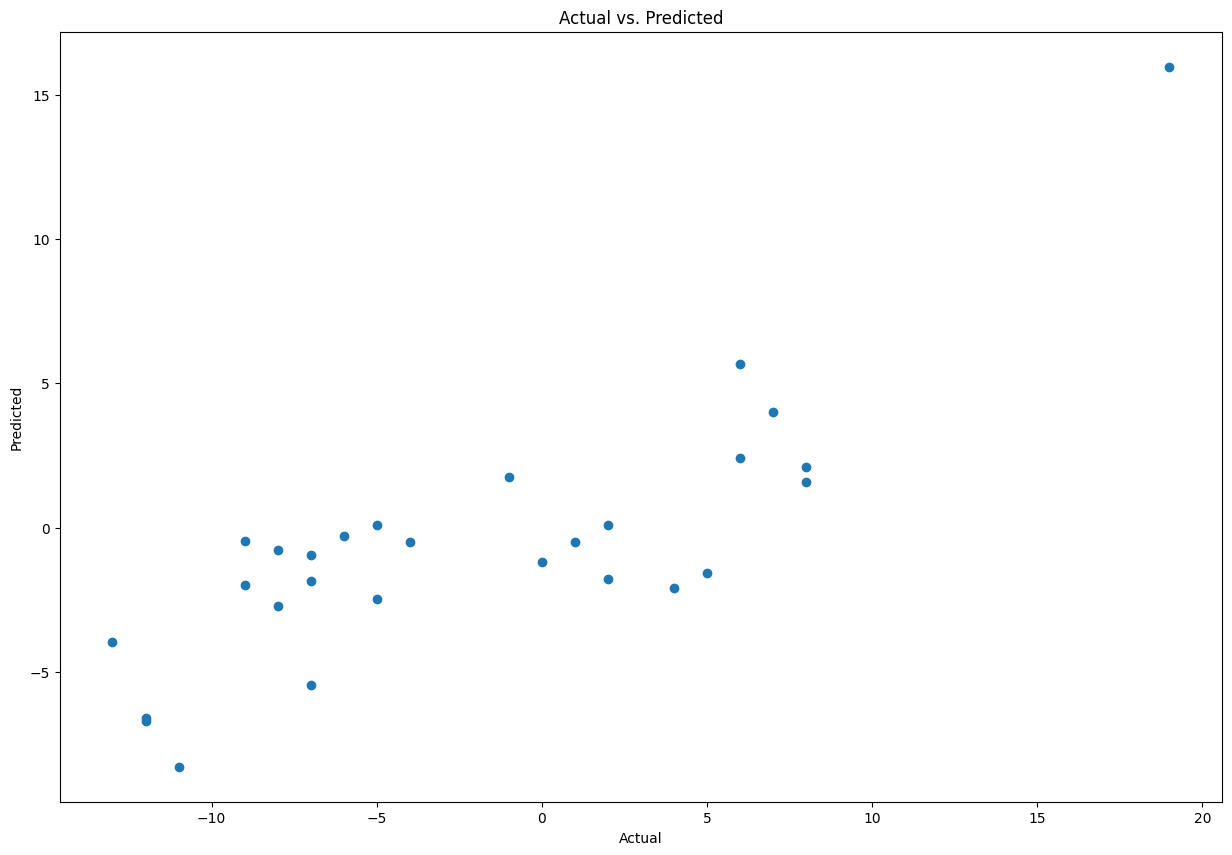

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")

Predicted Values

In [ ]:
pred_y_df = pd.DataFrame({"Actual Value": Y_test, "Predicted Value": Y_pred, "Difference": Y_test - Y_pred})
pred_y_df

,Actual Value,Predicted Value,Difference
98,8.00,2.11,5.89
231,-8.00,-0.78,-7.22
22,6.00,2.40,3.60
100,-8.00,-2.72,-5.28
71,0.00,-1.20,1.20
182,8.00,1.57,6.43
173,-4.00,-0.50,-3.50
112,-7.00,-0.95,-6.05
117,-12.00,-6.58,-5.42
194,-13.00,-3.97,-9.03
